<a href="https://www.kaggle.com/yassineboukhari/heart-disease-eda?scriptVersionId=87251342" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA on Heart Disease Dataset 

## Motivation et description du projet 

Pour ce projet on s'intéressera à la modélisation et l'implémentation d'un modèle de machine learning lié à la prédiction de présence de maladie cardiaque sur un ensemble de patients, dans le cadre de la compétition Kaggle [Heart Disease classifications machine learning](https://www.kaggle.com/cdabakoglu/). Notre base de données est fournit par **UCI-Machine_Learning** a pour description comme suit :

Le contexte :

Cette base de données contient 76 attributs, mais toutes les expériences publiées se réfèrent à l'utilisation d'un sous-ensemble de 14 d'entre eux. En particulier, la base de données de Cleveland est la seule à avoir été utilisée par les chercheurs en ML à
ce jour. Le champ "objectif" fait référence à la présence d'une maladie cardiaque chez le patient. Il s'agit d'un nombre entier de 0 (pas de présence) à 4.

Contenu

Information sur les attributs :

> age

> sex

> chest pain type (4 values)

> resting blood pressure

> serum cholestoral in mg/dl

> fasting blood sugar > 120 mg/dl

> resting electrocardiographic results (values 0,1,2)

> maximum heart rate achieved

> exercise induced angina

> oldpeak = ST depression induced by exercise relative to rest

> the slope of the peak exercise ST segment

> number of major vessels (0-3) colored by flourosopy

> thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


## Présentation

Pour cette première partie on se concentrera à l'analyse des données liée au dataset, pour cela on commencera par une étude sur la distribution de nos variables explicatives ainsi que la modélisation graphique de nos résultats  

### Ajout des dépendances

In [1]:
#Data process
import numpy as np 
import pandas as pd
#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

#Etape de Preprocess 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

### Importation de nos données 

In [2]:
hd=pd.read_csv('../input/heart-disease-uci/heart.csv')

In [3]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


* Notre dataset contient **303 lignes** et **14 colonnes**, voyons maintenant le type des que l'on va manier

In [4]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#La varible à prédire est target on la sépare de notre base de données
#pour rester dans la continuité de l'étude de nos attributs
hd_pred=hd.drop('target',axis=1)
{column : len(hd_pred[column].unique()) for column in hd_pred.columns}

{'age': 41,
 'sex': 2,
 'cp': 4,
 'trestbps': 49,
 'chol': 152,
 'fbs': 2,
 'restecg': 3,
 'thalach': 91,
 'exang': 2,
 'oldpeak': 40,
 'slope': 3,
 'ca': 5,
 'thal': 4}

* On constate que que quleques variables (**'cp'**,**'slope'**,**'thal'**) malgré le fait qu'elles soient numériques sont de tyoe ordinal chose qui pourra poser problème pour le cas à suivre dans la prédiction. Afin de régler ce soucis on introduira le one hot encoding qui se chargera de  transformer la nature de nos données 

* Voyons maintenant la distribution statistiques de nos données

In [6]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Exploratory Data Analysis

* Regardons plus en détails la dispersion de nos données ainsi que la distrubution de nos classes à prédire

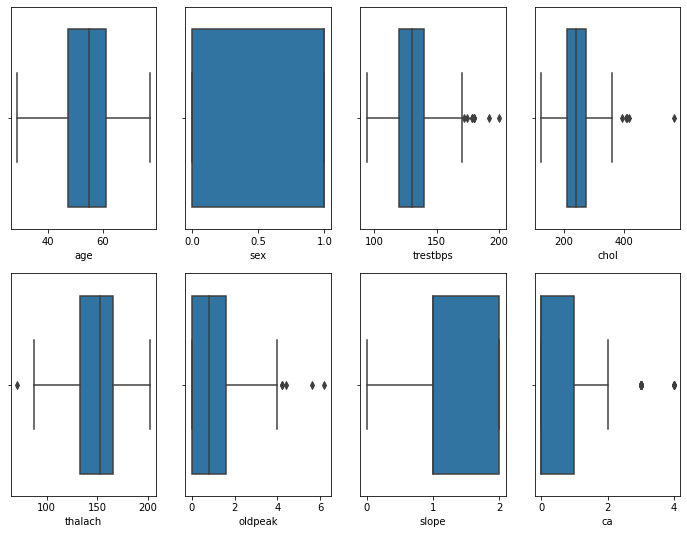

In [7]:
numeric_feat=['age','sex','trestbps','chol','thalach','oldpeak','slope','ca']
plt.figure(figsize=(12,9))
eda_hd=hd.loc[:,numeric_feat].copy()
eda_hd
for i in range(len(eda_hd.columns)):
    plt.subplot(2,4,i+1)
    sns.boxplot(eda_hd[eda_hd.columns[i]])
plt.show()

* On remarque que notre base de données contient pas mal de **outiliers**, on verra par la suite une manière de fixer ce léger soucis. 

* Passons maintenant à la visualisation de la dépendance entre nos variables pour cela  on fera appel la matrice de corrélation 

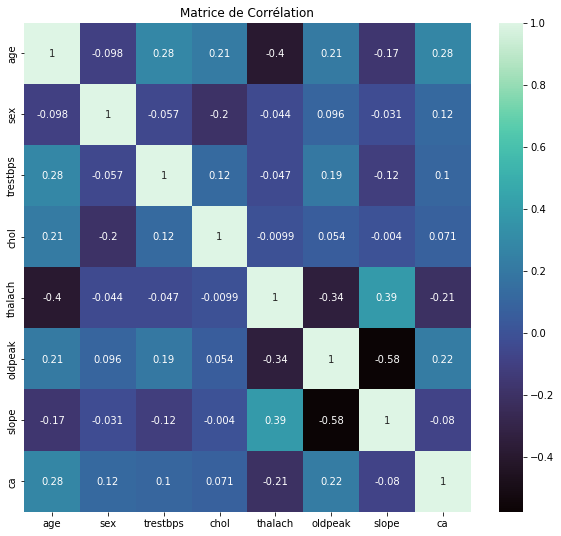

In [8]:
eda_corr=eda_hd.corr()
plt.figure(figsize=(10,9))
sns.heatmap(eda_corr,annot=True,cmap='mako')
plt.title('Matrice de Corrélation')
plt.show()

* Regardons maintenant la distribution des classes 

([<matplotlib.patches.Wedge at 0x7f4608a24590>,
 [Text(-0.1534669293828939, 1.0892418930548835, 'Heart Disease'),
  Text(0.1534670313650796, -1.0892418786862677, 'No Heart Disease')])

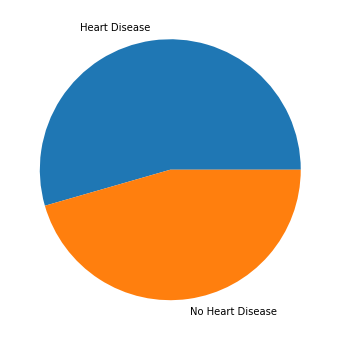

In [9]:
plt.figure(figsize=(6,6))
plt.pie(hd["target"].value_counts(),labels=['Heart Disease', 'No Heart Disease'])

### Preprocessing

In [10]:
def onehotencode(df,column_dict):
    df=df.copy()
    for column, prefix in column_dict.items():
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df
    

In [11]:
def preproces(data,scaler):
    data=data.copy()
    
#One hot encode
    nominal_feat=['cp','slope','thal']
    data=onehotencode(data,dict(zip(nominal_feat,['CP','SL','TH'])))
    
    #Split nos données
    y=data['target'].copy()
    X=data.drop('target',axis=1).copy()
    
    #Scale X
    X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
    
    return X,y


In [12]:
X,y=preproces(hd,StandardScaler())

In [13]:
X.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3
0,0.952197,0.681005,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-0.714429,...,-0.444554,-0.634648,3.489114,3.664502,-0.926766,-0.939142,-0.081514,3.979112,-1.100763,-0.793116
1,-1.915313,0.681005,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-0.714429,...,-0.444554,1.575677,-0.286606,3.664502,-0.926766,-0.939142,-0.081514,-0.251312,0.908461,-0.793116
2,-1.474158,-1.468418,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,-0.714429,...,2.249444,-0.634648,-0.286606,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116
3,0.180175,0.681005,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,-0.714429,...,2.249444,-0.634648,-0.286606,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116
4,0.290464,-1.468418,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,-0.714429,...,-0.444554,-0.634648,-0.286606,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116


In [14]:
X.to_csv('train.csv',index=False)
y.to_csv('test.csv',index=False)

### Other visualisation technics

Comparé à ce qui précède ici on s'intéressera à une analyse des données plus poussée que précédemment afin de voir l'impact que ça a sur nos prédiction futur. Une première différentiation ce portera sur le fait que ici nous transformerons quelques variables en format catégorique.

In [15]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Cleaning et Preprocessing

* On commence par expliciter les noms de nos features.

In [16]:
# On renomme nos features par le nom au complet
hd.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','nb_vessels','thal','target']

In [17]:
hd

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,nb_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


* Passons maintenant à la transformation de quelques variables sous format catégorique

In [18]:
hd['chest_pain_type'][hd['chest_pain_type'] == 1] = 'typical angina'
hd['chest_pain_type'][hd['chest_pain_type'] == 2] = 'atypical angina'
hd['chest_pain_type'][hd['chest_pain_type'] == 3] = 'non-anginal pain'
hd['chest_pain_type'][hd['chest_pain_type'] == 4] = 'asymptomatic'



hd['rest_ecg'][hd['rest_ecg'] == 0] = 'normal'
hd['rest_ecg'][hd['rest_ecg'] == 1] = 'ST-T wave abnormality'
hd['rest_ecg'][hd['rest_ecg'] == 2] = 'left ventricular hypertrophy'



hd['st_slope'][hd['st_slope'] == 0] = 'upsloping'
hd['st_slope'][hd['st_slope'] == 1] = 'flat'
hd['st_slope'][hd['st_slope'] == 2] = 'downsloping'

hd["sex"] = hd.sex.apply(lambda  x:'male' if x==1 else 'female')

In [19]:
hd.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,nb_vessels,thal,target
0,63,male,non-anginal pain,145,233,1,normal,150,0,2.3,upsloping,0,1,1
1,37,male,atypical angina,130,250,0,ST-T wave abnormality,187,0,3.5,upsloping,0,2,1
2,41,female,typical angina,130,204,0,normal,172,0,1.4,downsloping,0,2,1
3,56,male,typical angina,120,236,0,ST-T wave abnormality,178,0,0.8,downsloping,0,2,1
4,57,female,0,120,354,0,ST-T wave abnormality,163,1,0.6,downsloping,0,2,1


* On regardons le nombre valeur contenu dans la variable 'Chest_pain_type'

In [20]:
hd['chest_pain_type'].value_counts()

0                   143
atypical angina      87
typical angina       50
non-anginal pain     23
Name: chest_pain_type, dtype: int64

In [21]:
hd['rest_ecg'].value_counts()

ST-T wave abnormality           152
normal                          147
left ventricular hypertrophy      4
Name: rest_ecg, dtype: int64

In [22]:
hd['st_slope'].value_counts()

downsloping    142
flat           140
upsloping       21
Name: st_slope, dtype: int64

In [23]:
hd['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [24]:
# On enlève les valeurs prise en 0 pour le st_slope
hd.drop(hd[hd.st_slope ==0].index,inplace=True)
hd['st_slope'].value_counts()

downsloping    142
flat           140
upsloping       21
Name: st_slope, dtype: int64

* Voyons voir si nos notre table de données présentes des données manquantes

In [25]:
hd.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
nb_vessels                 0
thal                       0
target                     0
dtype: int64

* Comme on peut le voir notre base de données ne contient aucune données manquantes ce qui est en soit  bon signe pour la suite de l'étude. Passons maintenant à l'exploration analytique de notre dataset. 

#### Analyse exploratoire des données (EDA)  

* Regardons la dimension de notre dataset

In [26]:
hd.shape

(303, 14)

* Notre dataset contient 303 bilan muni de 13 features et 1 variable target permettant de données chances d'un arrêt cardiaque. Reagrdons de plus près les propriétés statistiques de notre Dataset.

In [27]:
hd.describe()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.729373,2.313531,0.544554
std,9.082101,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,1.022606,0.612277,0.498835
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,4.000000,3.000000,1.000000


* Comme on peut le voir quelque feature présente des outliers chose qui peut être deviné par la grosse dispersion des valeurs comme par exemple **'Cholesterol'** et **'Resting_blood_pressure'**  entre autre. Passons maintenant aux **variables catégoriques** 

In [28]:
hd.describe(include=[np.object])

,sex,chest_pain_type,rest_ecg,st_slope
count,303,303,303,303
unique,2,4,3,3
top,male,0,ST-T wave abnormality,downsloping
freq,207,143,152,142


* Analysons la distribution selon les arrêts cardiaques

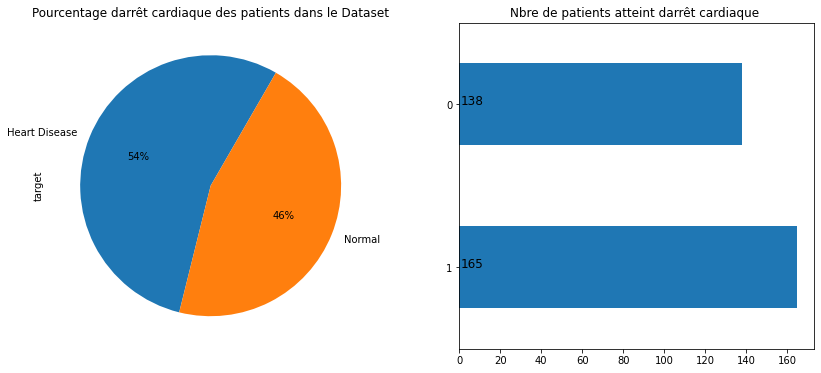

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = hd['target'].value_counts().plot.pie( x="Heart disease" ,y ='nbre.de patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Pourcentage d''arrêt cardiaque des patients dans le Dataset')

ax2 = hd["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(hd["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'Nbre de patients atteint d''arrêt cardiaque ')
plt.show()

* Regardons la distribution selon la variable **'Sex'** et **'Age'**

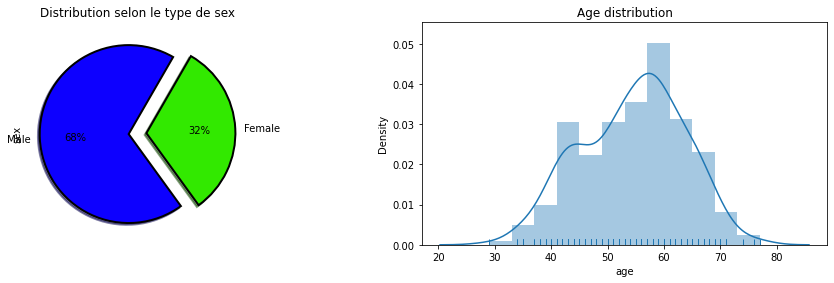

In [30]:
#Pie plot
plt.figure(figsize=(16,9))
plt.subplot(221)
hd["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution selon le type de sex")

#Distribution age
plt.subplot(222)
ax= sns.distplot(hd['age'], rug=True)
plt.title("Age distribution")
plt.show()

* Comme on peut le constater les hommes sont plus touchés par les arrêts cardiaques que les femmes, où la moyenne tourne vers les 60 ans. Dans ce qui va suivre on s'intéresse à séparer les patients normaux et les patients atteints d'antécendants cardiaques

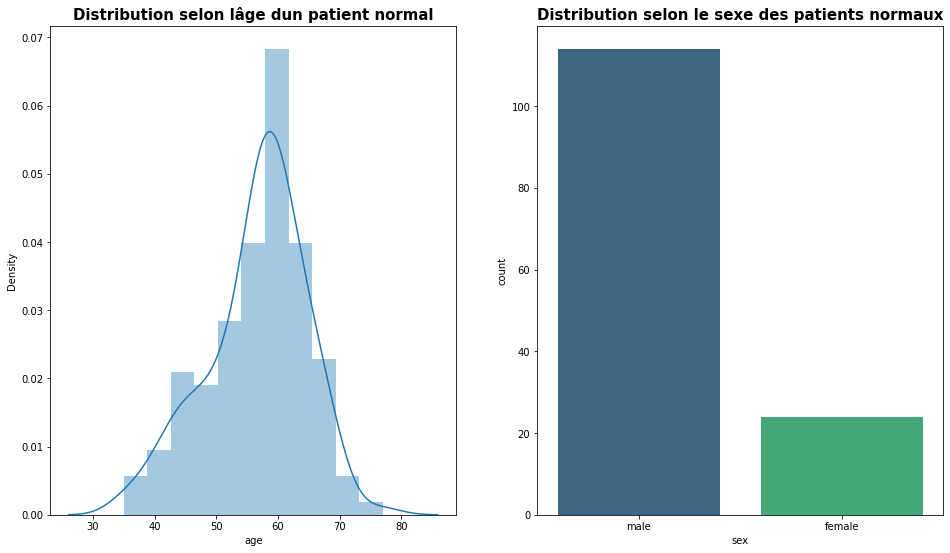

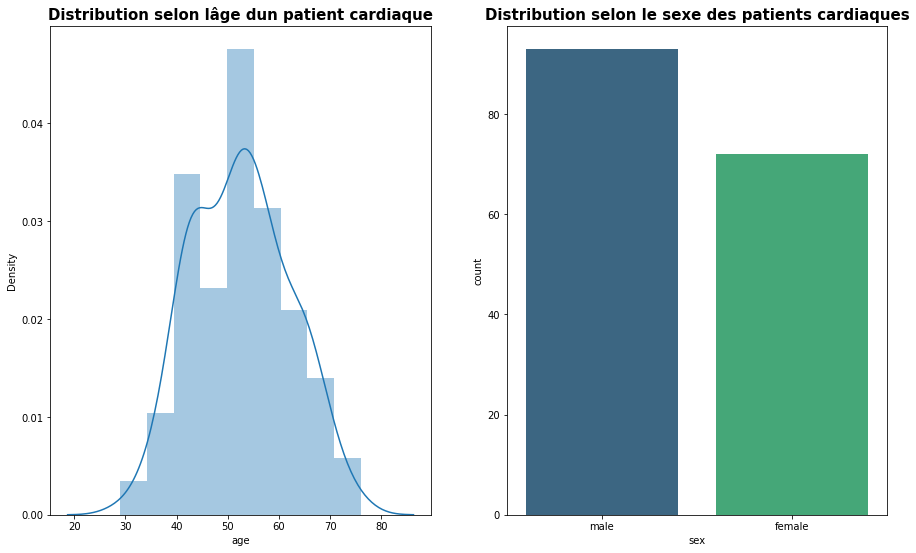

In [31]:
#Voyons la distribution des patients normaux
target_1=hd[hd['target']==1]
target_0=hd[hd['target']==0]
fig=plt.figure(figsize=(16,9))
#Cas des patients normaux (target=0)
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(target_0['age'])
plt.title('Distribution selon l''âge d''un patient normal',fontsize=15, weight='bold') 
#Gender distribution pour les patients normaux
ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(target_0['sex'],palette='viridis')
plt.title('Distribution selon le sexe des patients normaux',fontsize=15,weight='bold')
plt.show()

#Distribution selon l'âge et le sex pour les patient atteint d'arrêt cardiaque
fig=plt.figure(figsize=(15,9))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(target_1['age'])
plt.title('Distribution selon l''âge d''un patient cardiaque',fontsize=15, weight='bold') 
#Gender distribution pour les patients cardiaques
ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(target_1['sex'],palette='viridis')
plt.title('Distribution selon le sexe des patients cardiaques',fontsize=15,weight='bold')
plt.show()

* Comme vu plus haut la moyenne des décès par arrêt cardiaque est fixée vers les environs de 58 ou 60 ans et on a une supériorité des décès plus distingué chez le sexe masculin. Voyons maintenant l'impact selon la variable **"Chest pain"** dans le cas de patients normaux et cardiaques. 

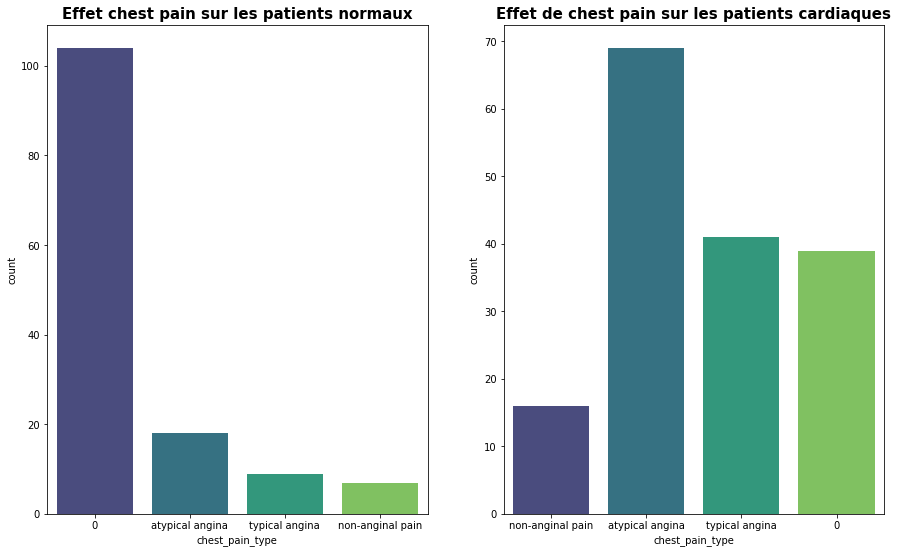

In [32]:
fig=plt.figure(figsize=(15,9))
#Patients normaux
ax=plt.subplot2grid((1,2),(0,0))
sns.countplot(target_0['chest_pain_type'],palette='viridis')
plt.title('Effet chest pain sur les patients normaux',fontsize=15,weight='bold')
#patients Cardiaques
ax=plt.subplot2grid((1,2),(0,1))
sns.countplot(target_1['chest_pain_type'],palette='viridis')
plt.title('Effet de chest pain sur les patients cardiaques',fontsize=15,weight='bold')
plt.show()

* Regardons plus précisément les paramètres les plus présents dans le cas de décès dans les deux cas

In [33]:
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(hd[plot_criteria[0]], hd[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
0,75.360000,23.640000
atypical angina,13.040000,41.820000
non-anginal pain,5.070000,9.700000
typical angina,6.520000,24.850000


**Comments**

* Distrubtion du Rest ECG

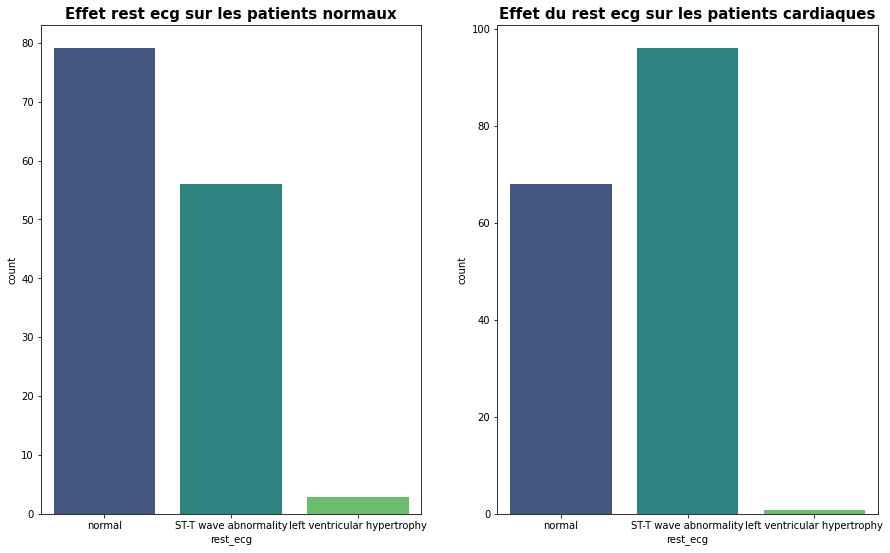

In [34]:
fig=plt.figure(figsize=(15,9))
#Patients normaux
ax=plt.subplot2grid((1,2),(0,0))
sns.countplot(target_0['rest_ecg'],palette='viridis')
plt.title('Effet rest ecg sur les patients normaux',fontsize=15,weight='bold')
#patients Cardiaques
ax=plt.subplot2grid((1,2),(0,1))
sns.countplot(target_1['rest_ecg'],palette='viridis')
plt.title('Effet du rest ecg sur les patients cardiaques',fontsize=15,weight='bold')
plt.show()

In [35]:
plot_criteria=['rest_ecg','target']
cm=sns.light_palette('red',as_cmap=True)
(round(pd.crosstab(hd[plot_criteria[0]],
                   hd[plot_criteria[1]],
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,40.580000,58.180000
left ventricular hypertrophy,2.170000,0.610000
normal,57.250000,41.210000


* Regardons maintenant l'effet de la variable **'Slope'**

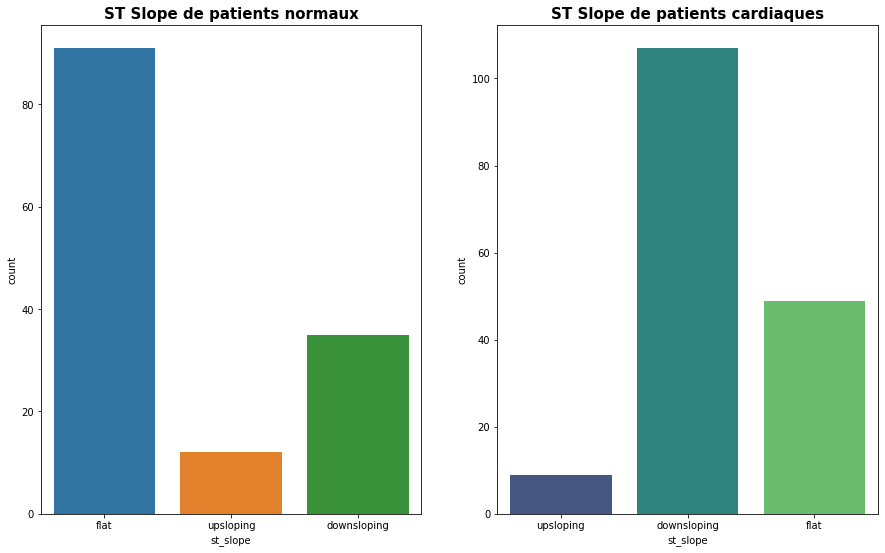

In [36]:
#  normal patients
fig = plt.figure(figsize=(15,9))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(target_0['st_slope'])
plt.title('ST Slope de patients normaux', fontsize=15, weight='bold')

#Patients cardiaque
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(target_1['st_slope'], palette='viridis')
plt.title('ST Slope de patients cardiaques', fontsize=15, weight='bold' )
plt.show()

In [37]:
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(hd[plot_criteria[0]], hd[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


target,0,1
st_slope,,
downsloping,25.360000,64.850000
flat,65.940000,29.700000
upsloping,8.700000,5.450000


* Comme on peut le voir pour les patients non atteints d'arrêt cardiaque ont pour spécifité la catégorie **'flat'** là où les personnes décèdées ont comme catégories dominantes **'downsloping'** au niveau de l'artère relié au coeur.

Passant maintenant à la distribution de nos valeurs numériques

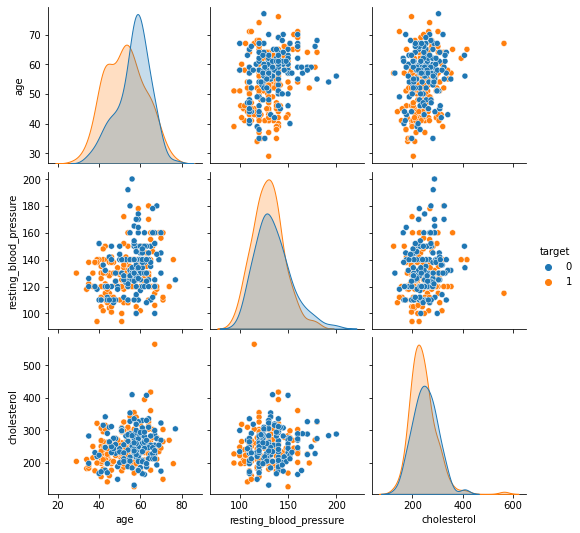

In [38]:
sns.pairplot(hd,hue='target',vars= ['age', 'resting_blood_pressure', 'cholesterol'])

* Comme on peut le voir plus l'âge augmente plus nos chances d'avoir un arrêt cardiaque augmente, Regardons plus précisément l'une de nos distributions obtenues plus haut.  

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

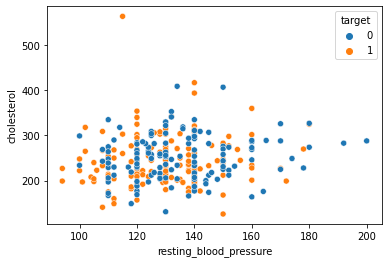

In [39]:
sns.scatterplot(x='resting_blood_pressure',y='cholesterol',hue='target',data=hd)

* Comme on l'a cité avant on est belle est bien en présence de quelques outliers comme le montre le plot ci-dessus avec des valeurs assez dispersées.

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

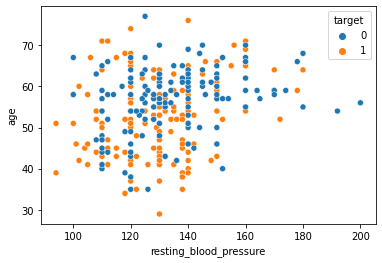

In [40]:
sns.scatterplot(x='resting_blood_pressure',y='age',hue='target',data=hd)

* Passons maintenant à l'étape de suppression d'outliers, on commence par sélectionner les valeurs de type numériques

In [41]:
hd_numeric = hd[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [42]:
hd_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,63,145,233,150
1,37,130,250,187
2,41,130,204,172
3,56,120,236,178
4,57,120,354,163


* Calculons le z-score donnée par $ z=\frac{x-\mu}{\sigma} $ afin d'effacer les outliers.

In [43]:
#model validation
import scipy as sp

z=np.abs(sp.stats.zscore(hd_numeric))
print(z)

          age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0    0.952197                0.763956     0.256334                 0.015443
1    1.915313                0.092738     0.072199                 1.633471
2    1.474158                0.092738     0.816773                 0.977514
3    0.180175                0.663867     0.198357                 1.239897
4    0.290464                0.663867     2.082050                 0.583939
..        ...                     ...          ...                      ...
298  0.290464                0.478391     0.101730                 1.165281
299  1.033002                1.234996     0.342756                 0.771706
300  1.503641                0.706843     1.029353                 0.378132
301  0.290464                0.092738     2.227533                 1.515125
302  0.290464                0.092738     0.198357                 1.064975

[303 rows x 4 columns]


* Afin de mieux filter nos données on se fixe un seuil à ne pas dépasser pour limiter les dépassements de données

In [44]:
threshold = 3
print(np.where(z > 3))

(array([ 28,  85, 220, 223, 246, 248, 272]), array([2, 2, 2, 1, 2, 1, 3]))


* Filtrons maintenant nos données 

In [45]:
hd=hd[(z<3).all(axis=1)]

* Regardons maintenant les données préservées pour le reste de notre étude. 

In [46]:
hd.shape

(296, 14)

* Avant de passer maintenant à l'étape de prédiction commençons par transformer nos données catégoriques en fomat numériques à l'aide de la fonction **getdummies()** et séparer nos features de la variable à prédire **'Target'**

In [47]:
hd=pd.get_dummies(hd,drop_first=True)
hd.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,thal,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,63,145,233,1,150,0,2.3,0,1,1,1,0,1,0,0,1,0,1
1,37,130,250,0,187,0,3.5,0,2,1,1,1,0,0,0,0,0,1
2,41,130,204,0,172,0,1.4,0,2,1,0,0,0,1,0,1,0,0
3,56,120,236,0,178,0,0.8,0,2,1,1,0,0,1,0,0,0,0
4,57,120,354,0,163,1,0.6,0,2,1,0,0,0,0,0,0,0,0


In [48]:
# Séparation de nos features et la variable target
X = hd.drop(['target'],axis=1)
y = hd['target']

* Regardons maintenant la corrélation pour vérifier si une Réduction de dimension sera nécessaire pour le bon développement de notre modèle de prédiction

<AxesSubplot:title={'center':'Correlation avec le diabète'}>

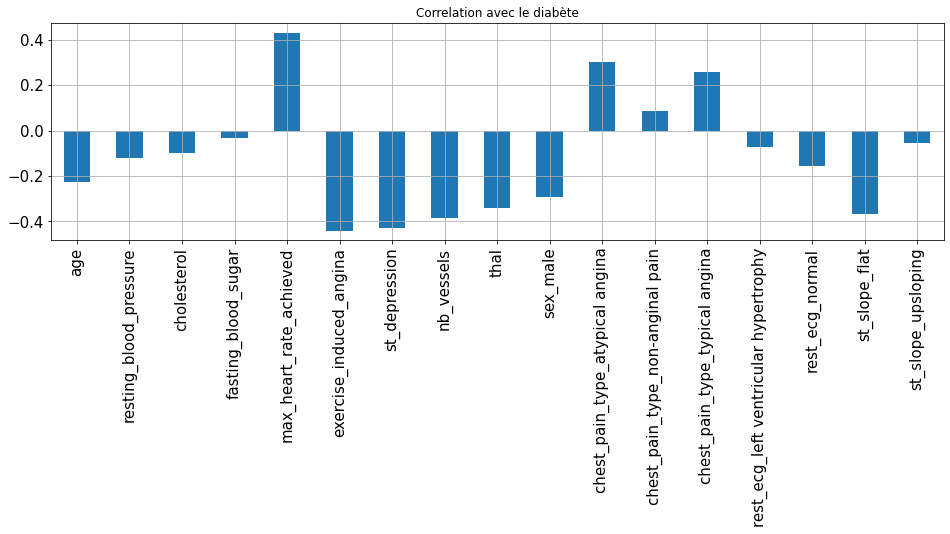

In [49]:
X.corrwith(y).plot.bar(figsize=(16,4),title='Correlation avec le diabète',
                       fontsize = 15,rot = 90, grid = True)

#### Split en Train et Test

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,shuffle=True,random_state=5)

* Regardons la distribution de nos variables après le split

In [51]:
print('la distribution de la variable target dans le train set :')
print(y_train.value_counts())
print('la distribution de la variable target dans le test set :')
print(y_test.value_counts())

la distribution de la variable target dans le train set :
1    130
0    106
Name: target, dtype: int64
la distribution de la variable target dans le test set :
1    33
0    27
Name: target, dtype: int64


* Regardons maintenant la distribution liée aux features 

In [52]:
print('La distribution liée aux features dans le train set :')
print(X_train.shape)
print('La distribution liée aux features dans le test set :')
print(X_test.shape)

La distribution liée aux features dans le train set :
(236, 17)
La distribution liée aux features dans le test set :
(60, 17)


* Passons maintenant à la normalisation de nos données d'apprentissage

In [53]:
scal=MinMaxScaler()
#Pour cela prenons les variables purement numériques
num_feat=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']
X_train[num_feat] = scal.fit_transform(X_train[num_feat])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,thal,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
286,0.625000,0.465116,0.291045,0,0.626168,0,0.129032,2,2,1,0,1,0,0,0,0,0
164,0.187500,0.511628,0.182836,0,0.728972,0,0.000000,4,2,1,1,0,0,0,0,0,0
184,0.437500,0.651163,0.436567,0,0.308411,0,0.419355,0,3,1,0,0,0,0,1,1,0
190,0.458333,0.418605,0.667910,0,0.439252,1,0.193548,0,3,0,0,0,0,0,0,1,0
38,0.750000,0.709302,0.533582,0,0.495327,0,0.129032,0,2,0,1,0,0,0,0,0,0


In [54]:
X_test[num_feat]=scal.fit_transform(X_test[num_feat])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,thal,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
124,0.135135,0.000000,0.167568,0,0.919192,0,0.000000,0,2,0,1,0,0,0,0,0,0
93,0.540541,0.487179,0.648649,1,0.717172,1,0.000000,1,2,0,0,0,1,0,1,0,0
145,0.972973,0.794872,0.416216,0,0.555556,0,0.000000,0,2,1,0,0,1,0,1,0,0
0,0.783784,0.653846,0.351351,1,0.626263,0,0.657143,0,1,1,0,1,0,0,1,0,1
88,0.540541,0.205128,0.248649,0,0.707071,0,0.457143,0,2,0,1,0,0,0,0,1,0


#### CrossValidation

* On tentera d'appliqer dans ce qui va suivre le principe de cross validation pour filtrer les modèles les plus performants 

In [55]:
#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [56]:
# Initialisation des modèles de base de ML 
def GetBasedModel():
    basedModels = []
    #Logistic Regression
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    #Linear Discriminant Analysis
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    #KNN 7
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    #KNN 5
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    #KNN 9
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    #KNN 11
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    #DT
    basedModels.append(('CART' , DecisionTreeClassifier()))
    #Naive Bayes
    basedModels.append(('NB'   , GaussianNB()))
    #SVM Linear
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    #SVM polynomial
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    #Adaboost
    basedModels.append(('AB'   , AdaBoostClassifier()))
    #Gradient Boosting
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    #Random forest avec entropy
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    #Random forest avec Gini
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    #ExtraTrees Classifier avec 100
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    # ExtraTrees Classifier avec 500
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    #Multi layer Perceptron
    basedModels.append(('MLP', MLPClassifier()))
    #SGDC
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    #Xgboost 2000
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    #Xgboost 500
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    #Xgboost 100
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    #Xgboost 1000
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    #ExtraTrees Classifier avec 1000
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# function performant 10-fold cross validation sur tous les modèles de base
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return results,msg

In [57]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.785145 (0.096015)
LDA: 0.780978 (0.105591)
KNN7: 0.788587 (0.100131)
KNN5: 0.818297 (0.067391)
KNN9: 0.784783 (0.100176)
KNN11: 0.784601 (0.071925)
CART: 0.771739 (0.102566)
NB: 0.788768 (0.063484)
SVM Linear: 0.780978 (0.107223)
SVM RBF: 0.789130 (0.100928)
AB: 0.741123 (0.056581)
GBM: 0.800906 (0.072556)
RF_Ent100: 0.784420 (0.055578)
RF_Gini100: 0.797101 (0.065534)
ET100: 0.797283 (0.073865)
ET500: 0.793116 (0.079709)
MLP: 0.823188 (0.098302)
SGD3000: 0.738225 (0.104854)
[23:10:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:10:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:10:2

#### Construction du modèle

* Random forest critère 'Entropy'

In [58]:
rf_ent=RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe=rf_ent.predict(X_test)

* MLP

In [59]:
mlp=MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp=mlp.predict(X_test)

* K nearest Neighbor **param=9**

In [60]:
knn=KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

* Extra Tree Classifier (nbre estimateurs= 500)

In [61]:
et_100=ExtraTreesClassifier(n_estimators=100)
et_100.fit(X_train,y_train)
y_pred_et_100=et_100.predict(X_test)

* XGBoost (nbre estimateur = 500)

In [62]:
xgb=xgb.XGBClassifier(n_estimators=500)
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

[23:12:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


* SVM (noyau= lineaire)

In [63]:
svc=SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)

* Descente du gradient stochastique

In [64]:
sgd=SGDClassifier(max_iter=1000,tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd=sgd.predict(X_test)

* Adaboost

In [65]:
adab=AdaBoostClassifier()
adab.fit(X_train,y_train)
y_pred_ada=adab.predict(X_test)

* DT (CART, critère=GINI)

In [66]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

* Gradient boosting 

In [67]:
gbm=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

#### Evaluation du modèle

* Random Forest

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.85,0.9,0.818182,0.888889,0.857143,0.853535,5.180856,0.703526


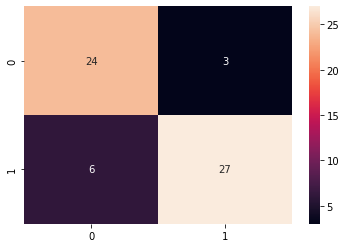

In [68]:
Conf_mat=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(Conf_mat, annot=True)

TN = Conf_mat[0][0]
FN = Conf_mat[1][0]
TP = Conf_mat[1][1]
FP = Conf_mat[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)
#Matthews_coef
MCC = matthews_corrcoef(y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,MCC]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

* Regardons pour le reste des modèles 

In [69]:
data = {        'MLP': y_pred_mlp, 
                'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et_100,
                'XGB': y_pred_xgb, 
                'SVC': y_pred_svc, 
                'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_dt, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    Conf_mat=confusion_matrix(y_test,models[column])
    
    TN = Conf_mat[0][0]
    FN = Conf_mat[1][0]
    TP = Conf_mat[1][1]
    FP = Conf_mat[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    MCC = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,MCC]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.850000,0.900000,0.818182,0.888889,0.857143,0.853535,5.180856,0.703526
1,MLP,0.900000,0.909091,0.909091,0.888889,0.909091,0.898990,3.453918,0.797980
2,KNN,0.866667,0.878788,0.878788,0.851852,0.878788,0.865320,4.605223,0.730640
3,EXtra tree classifier,0.900000,0.935484,0.878788,0.925926,0.906250,0.902357,3.453904,0.801125
4,XGB,0.900000,0.935484,0.878788,0.925926,0.906250,0.902357,3.453904,0.801125
5,SVC,0.916667,0.868421,1.000000,0.814815,0.929577,0.907407,2.878298,0.841191
6,SGD,0.800000,0.744186,0.969697,0.592593,0.842105,0.781145,6.907902,0.620784
7,Adaboost,0.816667,0.843750,0.818182,0.814815,0.830769,0.816498,6.332176,0.631228
8,CART,0.750000,0.846154,0.666667,0.851852,0.745763,0.759259,8.634747,0.520567
9,GBM,0.766667,0.880000,0.666667,0.888889,0.758621,0.777778,8.059088,0.560612


* Passons à la courbe de ROC-AUC

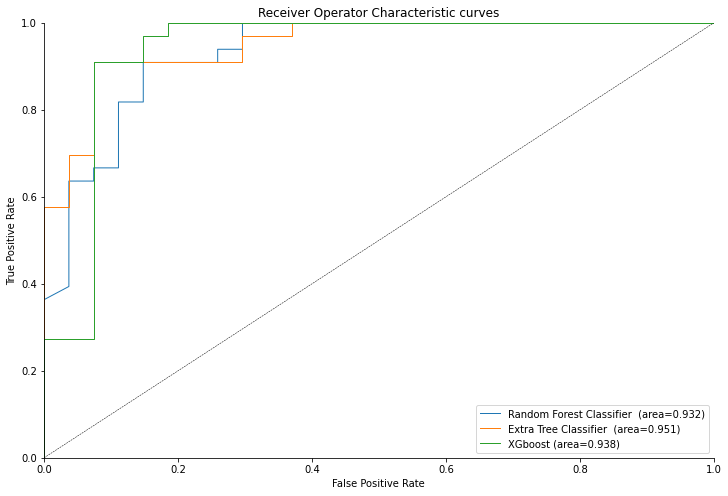

In [70]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

* La plus grande valeur pour la zone sous la courbe roc est atteinte par XGBoost

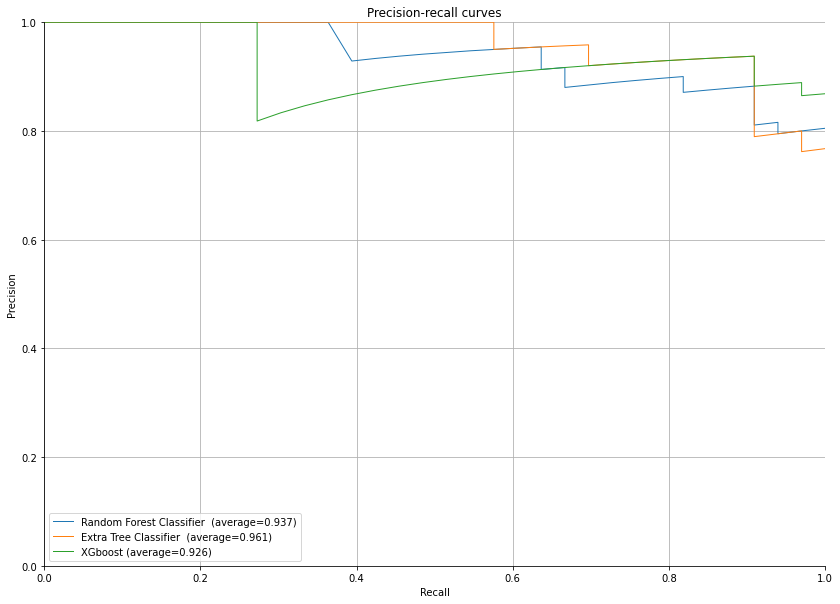

In [71]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

#### Feature Selection

In [72]:
num_feats=13

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calcul de la correlation avec y pour chaque feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # remplacer NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # Sélection des features ? 0 : ne pas selectionner, 1 : selectionner
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

13 selected features


In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

13 selected features


Commençons à présent la partie sélection des variables importantes

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 17 features.
13 selected features


# 

In [75]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

9 selected features


* Voyons maintenant avec Random Forest Classifier

In [76]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='gini'), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

8 selected features


* Feature Selection avec LGBM

In [77]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

13 selected features


In [78]:
# Rassemblons toutes les features selection ensemble
feature_name = X.columns
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# Nombre de features sélectionner 
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,thal,True,True,True,True,True,True,6
2,st_depression,True,True,True,True,True,True,6
3,nb_vessels,True,True,True,True,True,True,6
4,max_heart_rate_achieved,True,True,True,True,True,True,6
5,sex_male,True,True,True,True,False,True,5
6,exercise_induced_angina,True,True,True,False,True,True,5
7,chest_pain_type_typical angina,True,True,True,True,False,True,5
8,chest_pain_type_atypical angina,True,True,True,True,False,True,5
9,age,True,True,True,False,True,True,5
10,st_slope_flat,True,True,True,True,False,False,4


* Prenons compte des features les plus présentes après la méthode de sélection de feature, on segemente de nouveau notre dataset 

In [79]:
X = hd.drop(['target','resting_blood_pressure','st_slope_flat','chest_pain_type_non-anginal pain','cholesterol'],axis=1)
y = hd['target']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','max_heart_rate_achieved','st_depression']])
X_train.head()


,age,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,thal,sex_male,chest_pain_type_atypical angina,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_upsloping
286,0.625000,0,0.626168,0,0.129032,2,2,1,0,0,0,0,0
164,0.187500,0,0.728972,0,0.000000,4,2,1,1,0,0,0,0
184,0.437500,0,0.308411,0,0.419355,0,3,1,0,0,0,1,0
190,0.458333,0,0.439252,1,0.193548,0,3,0,0,0,0,0,0
38,0.750000,0,0.495327,0,0.129032,0,2,0,1,0,0,0,0


In [82]:
import xgboost as xgb
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.793478 (0.088535)
LDA: 0.805978 (0.095913)
KNN7: 0.780254 (0.101711)
KNN5: 0.771377 (0.065020)
KNN9: 0.788949 (0.097904)
KNN11: 0.789130 (0.100928)
CART: 0.725181 (0.106330)
NB: 0.801630 (0.074360)
SVM Linear: 0.801993 (0.087764)
SVM RBF: 0.801812 (0.100996)
AB: 0.780072 (0.067323)
GBM: 0.801268 (0.061424)
RF_Ent100: 0.805435 (0.077422)
RF_Gini100: 0.796920 (0.071311)
ET100: 0.776268 (0.068335)
ET500: 0.780435 (0.067875)
MLP: 0.827174 (0.078933)
SGD3000: 0.742029 (0.089219)
[23:12:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:4

* Soft voting classifier

In [83]:
import xgboost as xgb
clf1=RandomForestClassifier(criterion='entropy',n_estimators=100)

clf2=DecisionTreeClassifier()
clf3=xgb.XGBClassifier(n_estimators= 1000)
clf4=ExtraTreesClassifier(n_estimators= 500)

clf5=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')


eclf1 = VotingClassifier(estimators=[('rfe', clf1), ('decc', clf2), ('xgb', clf3),('ET',clf4),('gb',clf5),], 
                         voting='soft', weights=[4,1,2,3,1])
eclf1.fit(X_train,y_train)
y_pred_sv =eclf1.predict(X_test)
acc= accuracy_score(y_test, y_pred_sv)
prec = precision_score(y_test, y_pred_sv)
print('accuracy :%f et précision : %f'%(acc,prec))

[23:14:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy :0.816667 et précision : 0.843750


* Evaluation du modèle selon le Soft voting

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.816667,0.84375,0.818182,0.814815,0.830769,0.816498,6.332176,0.631228


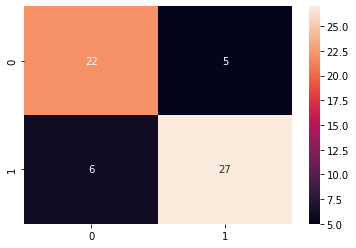

In [84]:
Conf_mat=confusion_matrix(y_test,y_pred_sv)
sns.heatmap(Conf_mat, annot=True)

TN = Conf_mat[0][0]
FN = Conf_mat[1][0]
TP = Conf_mat[1][1]
FP = Conf_mat[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_sv)
acc= accuracy_score(y_test, y_pred_sv)
roc=roc_auc_score(y_test, y_pred_sv)
prec = precision_score(y_test, y_pred_sv)
rec = recall_score(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)

CMM = matthews_corrcoef(y_test, y_pred_sv)
model_results =pd.DataFrame([['Soft Voting',acc, prec,rec,specificity, f1,roc, loss_log,CMM]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results